In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#Load and Preprocess Dataset

# Load the dataset (Update the path as needed)
df = pd.read_csv('/content/drive/MyDrive/ML_Assignments/datasets/US_City_Temp_Data.csv')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Select the city you want to predict temperature for
city = 'albuquerque'

In [4]:
#Feature Engineering
# Extract month from the datetime
df['month'] = df['time'].dt.month

# One-hot encode the month column
df = pd.get_dummies(df, columns=['month'], prefix='month')

# Define features (X) and target (y)
X = df.drop(columns=['time', city])
y = df[city]

In [5]:
# Train-test split without shuffling to preserve time order
X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    X, y, df['time'], test_size=0.2, random_state=42, shuffle=False
)

In [6]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Results for {city.title()}:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Results for Albuquerque:
MSE: 0.34
MAE: 0.47
R²: 1.00


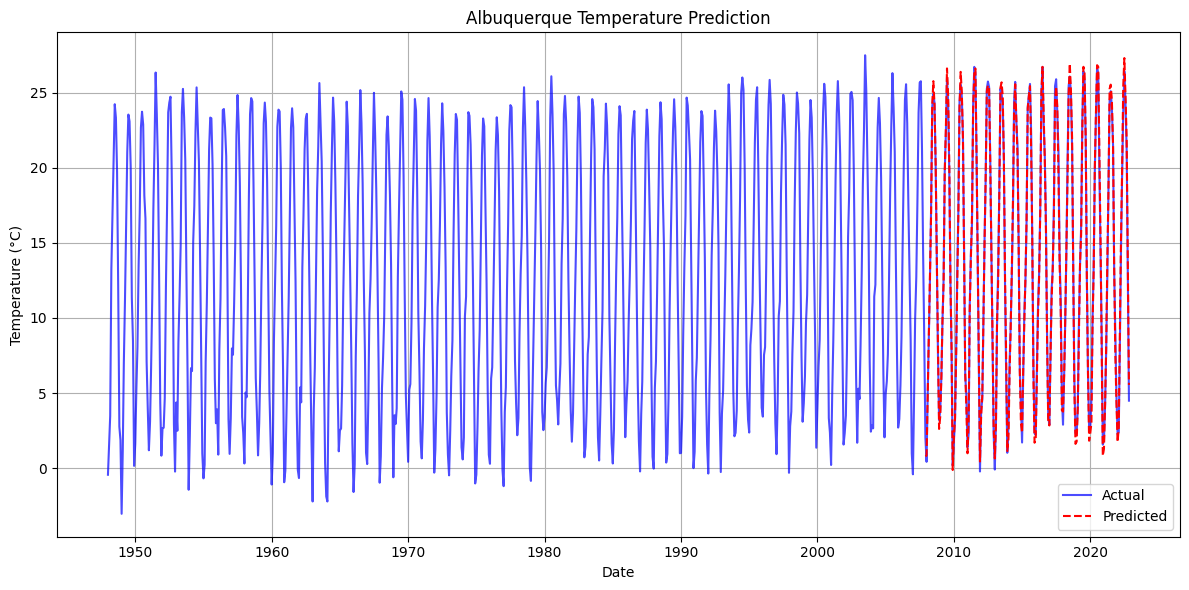

In [8]:
plt.figure(figsize=(12, 6))

# Actual temperature over time (entire dataset)
plt.plot(df['time'], y, label='Actual', alpha=0.7, color='blue')

# Predicted temperature on test data
plt.plot(time_test, y_pred, label='Predicted', color='red', linestyle='--')

plt.title(f"{city.title()} Temperature Prediction")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()